In [11]:
# %%
import time
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# %%
def perf(fn, runs, *args):
  total = 0.0
  for _ in range(runs):
    start = time.perf_counter()
    fn(*args)
    total += time.perf_counter() - start
  return (total / runs) * 1000  # ms

In [13]:
# %%
def linear_loop(arr, target):
  for x in arr:
    if x == target:
      return True
  return False


def linear_in(arr, target):
  return target in arr


def linear_index(arr, target):
  try:
    return arr.index(target)
  except ValueError:
    return -1


def dict_lookup(_, target, search_dict):
  return search_dict[target]

In [15]:
# %%
sizes = (
    [1, 10, 100, 1_000, 10_000, 100_000, 1_000_000]
    + list(range(2_000_000, 10_000_001, 1_000_000))
)

len(sizes)
sizes

16

[1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 2000000,
 3000000,
 4000000,
 5000000,
 6000000,
 7000000,
 8000000,
 9000000,
 10000000]

In [16]:
# %%
datasets = []

for n in sizes:
  arr = np.random.permutation(n).tolist()
  target = arr[-1]
  search_dict = {v: i for i, v in enumerate(arr)}
  datasets.append((arr, target, search_dict))

In [27]:
len(datasets)
print(datasets[1][0])  # arr
print(datasets[1][1])  # target
print(datasets[1][2])  # search_dict

16

[1, 7, 4, 6, 3, 8, 2, 9, 5, 0]
0
{1: 0, 7: 1, 4: 2, 6: 3, 3: 4, 8: 5, 2: 6, 9: 7, 5: 8, 0: 9}


In [31]:
# %%
results = {
    "linear_loop": [],
    "in": [],
    "index": [],
    "dict": []
}

for arr, target, search_dict in datasets:
  n = len(arr)
  runs = 1000 if n <= 100_000 else 10

  results["linear_loop"].append(perf(linear_loop, runs, arr, target))
  results["in"].append(perf(linear_in, runs, arr, target))
  results["index"].append(perf(linear_index, runs, arr, target))
  results["dict"].append(perf(dict_lookup, runs, arr, target, search_dict))


for name, times in results.items():
  print(f"{name}:")
  for size, t in zip(sizes, times):
    print(f"    {size}: {t:.6f} ms")
  print()

linear_loop:
    1: 0.000111 ms
    10: 0.000251 ms
    100: 0.001859 ms
    1000: 0.020996 ms
    10000: 0.199785 ms
    100000: 1.691763 ms
    1000000: 18.809020 ms
    2000000: 37.127190 ms
    3000000: 64.033590 ms
    4000000: 84.037080 ms
    5000000: 101.695630 ms
    6000000: 122.096030 ms
    7000000: 131.827600 ms
    8000000: 158.632840 ms
    9000000: 196.649490 ms
    10000000: 231.290960 ms

in:
    1: 0.000088 ms
    10: 0.000154 ms
    100: 0.000664 ms
    1000: 0.006830 ms
    10000: 0.068177 ms
    100000: 0.679476 ms
    1000000: 10.624560 ms
    2000000: 21.266020 ms
    3000000: 35.522560 ms
    4000000: 48.552870 ms
    5000000: 58.946910 ms
    6000000: 74.595550 ms
    7000000: 77.783960 ms
    8000000: 82.169840 ms
    9000000: 115.755530 ms
    10000000: 125.542460 ms

index:
    1: 0.000107 ms
    10: 0.000150 ms
    100: 0.000891 ms
    1000: 0.006669 ms
    10000: 0.071792 ms
    100000: 0.673031 ms
    1000000: 10.757540 ms
    2000000: 20.676370 ms
    3

In [32]:
# %%
def plot(times, title):
  plt.figure()
  plt.plot(sizes, times, marker="o")
  plt.xlabel("Array size")
  plt.ylabel("Time (ms)")
  plt.title(title)
  plt.xscale("log")
  plt.yscale("log")
  plt.ylim(1e-4, 1e4)
  plt.grid(True)
  plt.show()

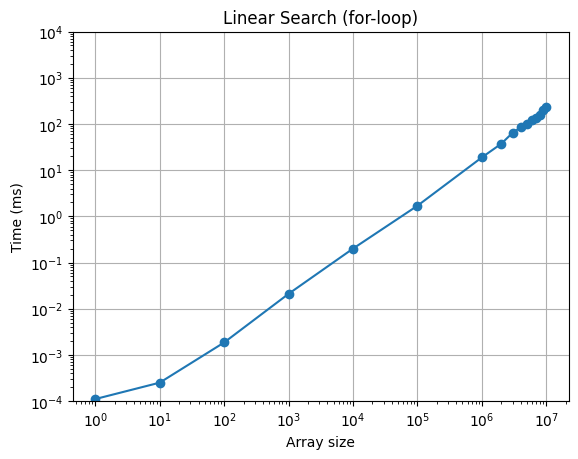

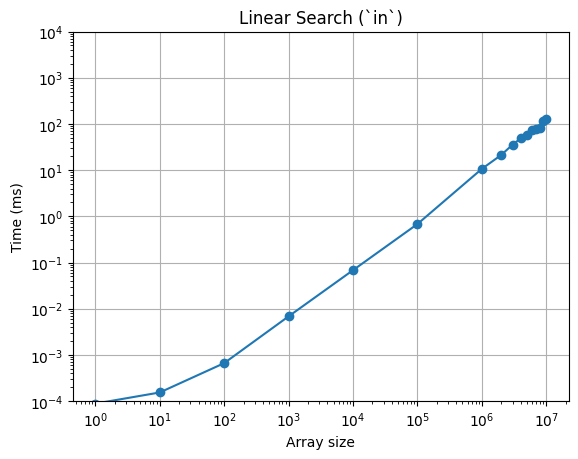

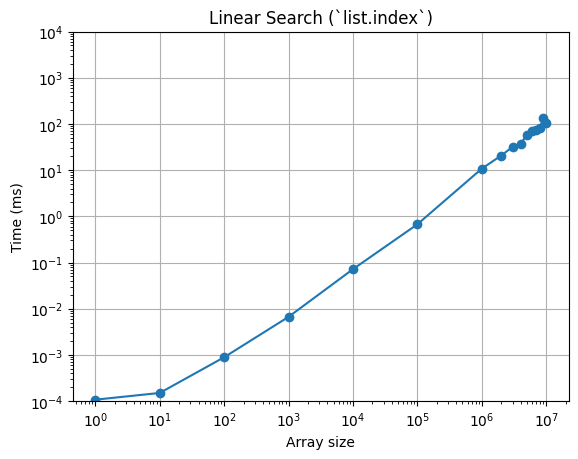

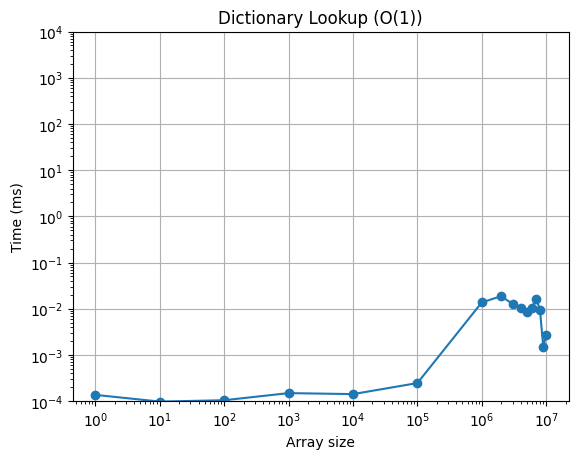

In [33]:
# %%
plot(results["linear_loop"], "Linear Search (for-loop)")
plot(results["in"], "Linear Search (`in`)")
plot(results["index"], "Linear Search (`list.index`)")
plot(results["dict"], "Dictionary Lookup (O(1))")